In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import os
from IPython.display import HTML
import seaborn as sns
from IPython.display import display
import numpy as np
import re


pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop

In [172]:
os.listdir('./datas')

['Pre_Season_Batter.csv',
 'Regular_Season_Batter.csv',
 'submission.csv',
 'Regular_Season_Batter_Day_by_Day_b4.csv']

## 데이터 살펴보기

In [173]:
# HTML 파일 내용 읽어오기
with open('./data_table_description.html', 'r') as f:
    html_content = f.read()

# HTML 내용 출력
print('데이터 도메인')
HTML(html_content)

데이터 도메인


Column Name,Pre/Regular_Season_Batter,Regular_Season_Batter_Day_by_Day,Submission
batter_id,타자 고유 ID,타자 ID,선수 고유 ID
batter_name,타자 이름,타자 이름,선수 이름
year,년도,년도,
team,소속 팀,,
avg,타율,,
avg1,,해당 경기 타율,
avg2,,시즌 누적 타율,
G,경기,,
AB,타수,타수,
R,득점,득점,


In [174]:
pd.read_csv('./datas/Regular_Season_Batter_Day_by_Day_b4.csv').head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [175]:
pd.read_csv('./datas/Pre_Season_Batter.csv').head(1)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959


In [176]:
pd.read_csv('./datas/Regular_Season_Batter.csv').head(1)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902


In [177]:
pd.read_csv('./datas/submission.csv').head()

,batter_id,batter_name
0,1,강경학
1,2,강구성
2,3,강민국
3,4,강민호
4,5,강백호


## 프리시즌 데이터 확인

In [178]:
preseason = pd.read_csv('./datas/Pre_Season_Batter.csv')
print(preseason.shape)
print()
print(preseason.info())
preseason.head()

(1393, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HB

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [179]:
# 데이터 기초 통계량

'''
1. 선수는 총 1393명이 있다.
2. 데이터는 2002년부터 2018년까지 존재한다.
'''

preseason.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


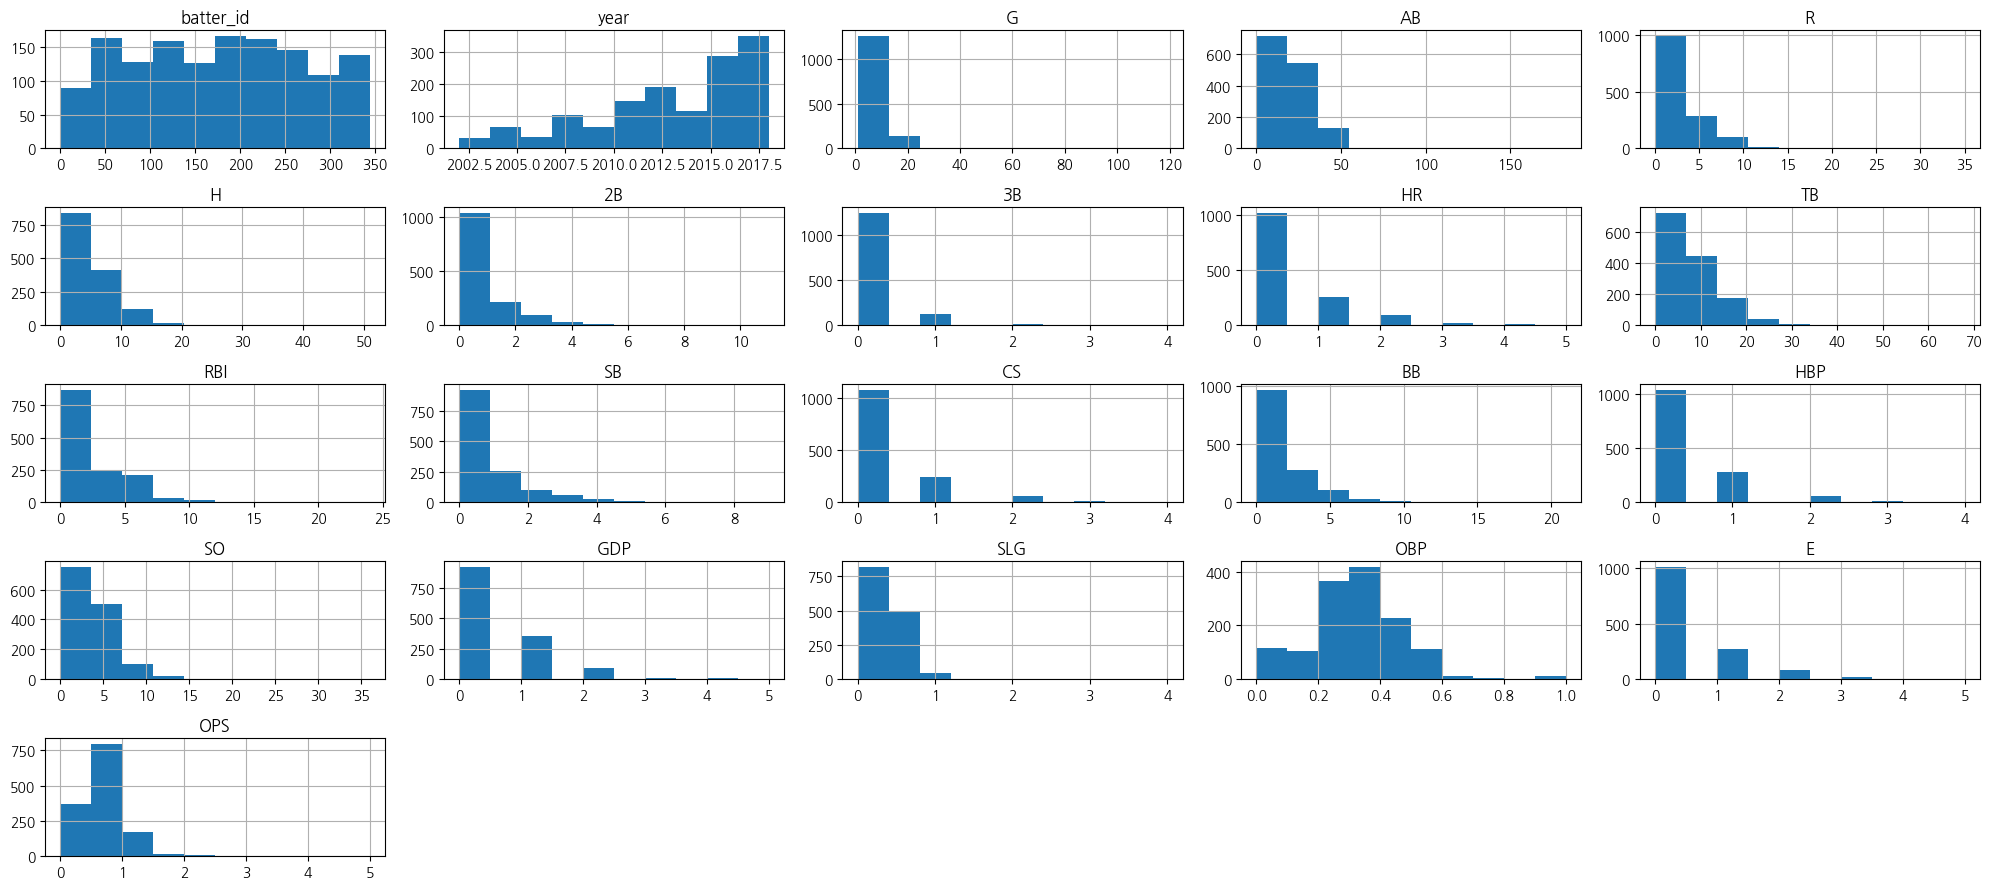

In [180]:
'''
프리시즌은 연습경기이기 때문에 많은 데이터가 0쪽에 가깝다.
예를 들어 1년에 일반적인 정규타석을 채우지 않았고, 득전, 타수, 안타 등이 0에 가깝다.
또한 데이터의 양은 과거보다 최근에 가까워 질수록 많아진다.
'''

preseason.hist(figsize=(20,9))
plt.tight_layout()
plt.show()

<Axes: xlabel='year', ylabel='OPS'>

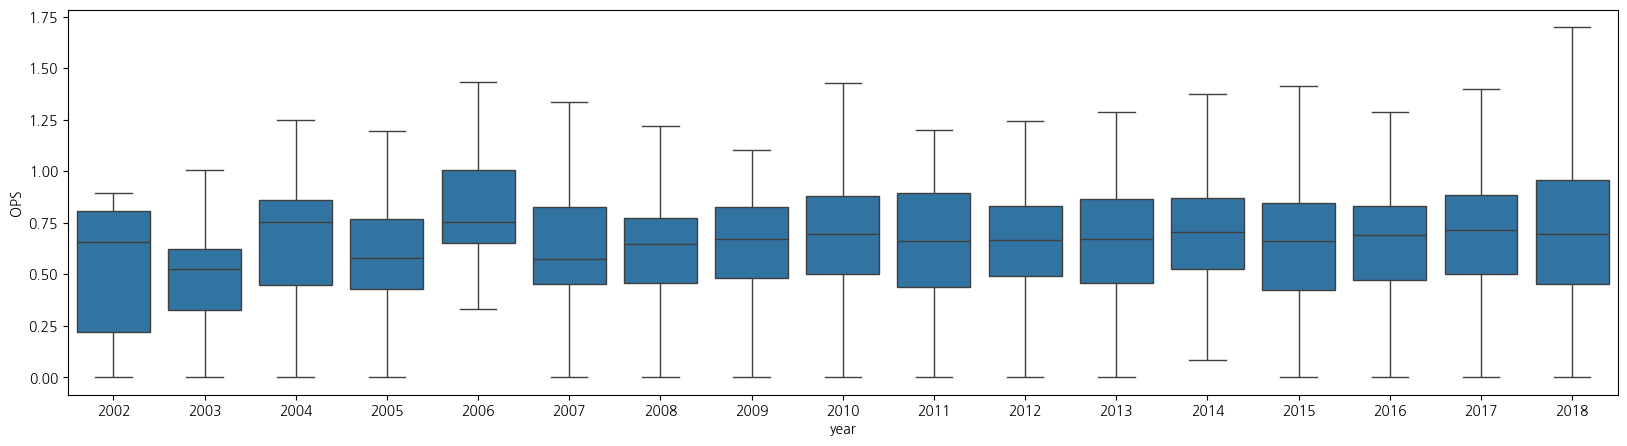

In [181]:
'''
데이터의 개수가 적어서 그런가 대부분의 연도의 OPS의 중앙값이 비슷하다.
'''
plt.figure(figsize=(20,5))
sns.boxplot(x='year', y='OPS', data=preseason, showfliers=False)

In [182]:
'''
몇 몇 선수들을 추출해 OPS를 비교해 보았다.

그러던 도중 결측값이 있는 것을 발견하였다.
'''

preseason_df_2002 = preseason[preseason['year'] == 2002]
preseason_df_2002

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
228,62,김주찬,2002,롯데,0.107,9,28,2,3,0,0,0,3,0,2,0,1,1,7,1,0.107,0.167,1,183cm/94kg,1981년 03월 25일,내야수(우투우타),충암초(장충리틀)-충암중-충암고-삼성-롯데,18000만원,0.274
260,67,김태균,2002,한화,0.235,11,34,7,8,5,0,1,16,4,1,0,4,1,14,0,0.471,0.333,2,185cm/110kg,1982년 05월 29일,내야수(우투우타),천안남산초-천안북중-북일고-(대전대),16000만원,0.804
413,109,박기혁,2002,롯데,0.000,8,5,1,0,0,0,0,0,0,0,0,0,0,4,0,0.000,0.000,0,179cm/77kg,1981년 06월 04일,내야수(우투우타),대구수창초-성광중-대구상고-롯데,8000만원,0.000
467,119,박용택,2002,LG,-,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,185cm/90kg,1979년 04월 21일,외야수(우투좌타),고명초-휘문중-휘문고-고려대,30000만원,NaN
511,131,박한이,2002,삼성,0.319,11,47,7,15,3,0,1,21,4,3,0,3,0,8,1,0.447,0.360,0,182cm/91kg,1979년 01월 28일,외야수(좌투좌타),초량초-부산중-부산고-동국대,30000만원,0.807
824,202,이대호,2002,롯데,0.359,11,39,4,14,3,0,1,20,4,0,0,1,0,8,1,0.513,0.375,1,194cm/130kg,1982년 06월 21일,내야수(우투우타),부산수영초-대동중-경남고-(영남사이버대)-롯데-시애틀,21000만원,0.888
844,207,이범호,2002,한화,0.167,7,6,2,1,1,0,0,2,2,0,0,0,0,1,0,0.333,0.167,0,183cm/96kg,1981년 11월 25일,내야수(우투우타),대구수창초-경운중-대구고-한화,11000만원,0.500
892,283,조동찬,2002,삼성,0.000,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/80kg,1983년 07월 27일,내야수(우투우타),공주중동초-공주중-공주고,12000만원,0.000
984,234,이진영,2002,SK,0.297,11,37,5,11,2,0,2,19,6,2,2,5,0,12,0,0.514,0.381,0,185cm/90kg,1980년 06월 15일,외야수(좌투좌타),군산초-군산남중-군산상고-쌍방울-SK-LG,10000만원,0.895
1115,269,정상호,2002,SK,0.158,13,19,3,3,1,0,1,7,2,0,0,3,1,5,0,0.368,0.304,5,187cm/100kg,1982년 12월 24일,포수(우투우타),석천초-동인천중-동산고-SK-상무-SK,45000만원,0.672


## 프리시즌 결측값 채우기

In [183]:
'''
결측값의 개수를 확인해 보았다.
'''

for i, j in preseason.isnull().sum().items():
    if not j == 0:
        print(i, j)
        
'''
nan 값이 있는 행만 추출해 보았다.

그 중에서 starting_salary부분이 nan인 경우는 제외 하였다.
'''
preseason[preseason.isna().any(axis=1) & preseason['starting_salary'].notna()].head()

SLG 29
OBP 25
starting_salary 214
OPS 29


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
37,8,강상원,2016,한화,-,6,0,1,0,0,0,0,0,0,2,1,0,0,0,0,NaN,NaN,0,172cm/64kg,1997년 05월 05일,외야수(우투좌타),온양온천초-온양중-북일고,3000만원,NaN
74,24,김강민,2003,SK,-,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,182cm/85kg,1982년 09월 13일,외야수(우투우타),본리초-대구중-경북고,11000만원,NaN
80,24,김강민,2009,SK,-,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,182cm/85kg,1982년 09월 13일,외야수(우투우타),본리초-대구중-경북고,11000만원,NaN
90,101,문선재,2009,LG,-,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1.0,0,184cm/80kg,1990년 05월 20일,외야수(우투우타),광주서림초-광주동성중-광주동성고-LG-상무,5000만원,NaN


In [184]:
'''
장타율과 출루율이 계산되지 않아 OPS가 NaN이 나온것을 확인 하였다.
검색해 보니 장타율 같은 경우에는 (3루타 + 2루타 + 홈런) / 안타 로 계산하는데 이것은 TBS식 장타율이라고 한다.
다른 데이터와 비교하여 TBS식 장타율로 계산되었으면 이것도 같은 방법으로 계산하여 채우려고 한다.
'''

# 3루타, 2루타, 홈런, 안타를 추출하여 계산
print(f'clac_SLG: {preseason.loc[0, ["3B", "2B", "HR"]].sum() / preseason.loc[0, ["H"]]}')
print(f'orig_SLG: {preseason.loc[0, "SLG"]}')
print()

'''
계산해 보니 다르다.
알고보니 이것은 일본 TBS 테레비의 루즈밸트 게임 드라마에서 나온 잘못된 계산식이라고 한다.

조금 더 찾아보니 다른 식을 찾을 수 있었다.
(1루타(단타) x 1 + 2루타 x 2 + 3루타 x 3 + 홈런 x 4) / 타수
'''

# 안타, 2루타, 3루타, 홈런을 추출하여 각각 1, 2, 3, 4씩 곱하고 이후 타수만큼 나눈다.
cnt = 1
SLG = 0
for i in preseason.loc[0, ['H', '2B', '3B', 'HR']]:
    SLG += i * cnt
    cnt += 1

SLG = SLG / preseason.loc[0, "AB"]
print(f'clac_SLG: {SLG}')
print(f'orig_SLG: {preseason.loc[0, "SLG"]}')
print()

'''
약 0.1 정도의 오차가 발생하였다.
어디서 잘못 되었나 좀 더 찾아보니
단타는 총 안타에서 2, 3루타 그리고 홈런을 제외한 숫자를 의미한다.
그러면 단타는 안타의 개수는 7이 아니라 2루타와 홈런을 제외한 5가 된다.
이것을 기반으로 다시 계산하였다.
'''

H = preseason.loc[0, 'H'] - preseason.loc[0, ['2B', '3B', 'HR']].sum()
cnt = 2
SLG = H
for i in preseason.loc[0, ['2B', '3B', 'HR']]:
    SLG += i * cnt
    cnt += 1

SLG = SLG / preseason.loc[0, "AB"]
print(f'clac_SLG: {SLG}')
print(f'orig_SLG: {preseason.loc[0, "SLG"]}')

clac_SLG: H    0.285714
Name: 0, dtype: object
orig_SLG: 0.55

clac_SLG: 0.65
orig_SLG: 0.55

clac_SLG: 0.55
orig_SLG: 0.55


In [185]:
'''
이제 저 계산식을 기반으로 NaN 값을 채우려고 한다.

이제 SLG는 다 채웠으니 OBP만 채우면 된다.
'''

def SLG_calc(row):
    # SLG가 NaN이 아닐 경우 그대로 반환
    if pd.notna(row['SLG']):
        return row['SLG']
    # 타수가 없는 경우
    if pd.notna(row['AB']) or row['AB'] == 0:
        return 0
    H = row['H'] - row[['2B', '3B', 'HR']].sum()
    SLG = (H + row['2B'] * 2 + row['3B'] * 3 + row['HR'] * 4) / row['AB']

    return SLG
    
display(preseason.head())
print()
preseason['SLG'] = preseason.apply(SLG_calc, axis=1)
display(preseason.head())

for i, j in preseason.isnull().sum().items():
    if not j == 0:
        print(i, j)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


OBP 25
starting_salary 214
OPS 29


In [186]:
'''
출루율의 계산 공식은 아래와 같다.
(안타 + 볼넷 + 사구) / (타수 + 볼넷 + 사구 + 희생 플라이)

하지만 주어진 데이터에는 희생 플라이는 존재하지 않는다.
그렇기 때문에 일단 0으로 두고 계산해 보았다.

이것으로 한 번 계산해 보았다.
'''

print(f'clac_OPS: {preseason.loc[0, ["H", "BB", "HBP"]].sum() / preseason.loc[0, ["AB", "BB", "HBP"]].sum()}')
print(f'orig_OPS: {preseason.loc[0, ["OBP"]]}')

'''
제대로 된 계산식임을 확인 하였기에 위와 똑같이 채워 주었다.
'''

def OBP_calc(row):
    # OBP가 NaN이 아닐 경우 그대로 반환
    if pd.notna(row['OBP']):
        return row['OBP']
    
    denominator = row[['H', 'BB', 'HBP']].sum()
    numerator = row[['AB', 'BB', 'HBP']].sum()
    
    # 분모 또는 분자가 0 인경우
    if denominator == 0 or numerator == 0:
        return 0
    
    OBP = denominator / numerator
    return OBP

preseason['OBP'] = preseason.apply(OBP_calc, axis=1)
display(preseason.head())

for i, j in preseason.isnull().sum().items():
    if not j == 0:
        print(i, j)

clac_OPS: 0.4090909090909091
orig_OPS: OBP    0.409
Name: 0, dtype: object


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


starting_salary 214
OPS 29


In [187]:
# OPS 계산
# OPS = SLG + OPB

def OPS_clac(row):
    return row[['SLG', 'OBP']].sum()

preseason['OPS'] = preseason.apply(OPS_clac, axis=1)
display(preseason)
for i, j in preseason.isnull().sum().items():
    if not j == 0:
        print(i, j)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,0,1,16,4,1,0,2,0,5,0,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,0,0,13,6,0,0,4,0,3,0,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,1,0,18,4,3,1,4,0,4,0,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,0,1,8,4,0,0,2,0,6,0,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833


starting_salary 214


## 연도별 선수 수 확인

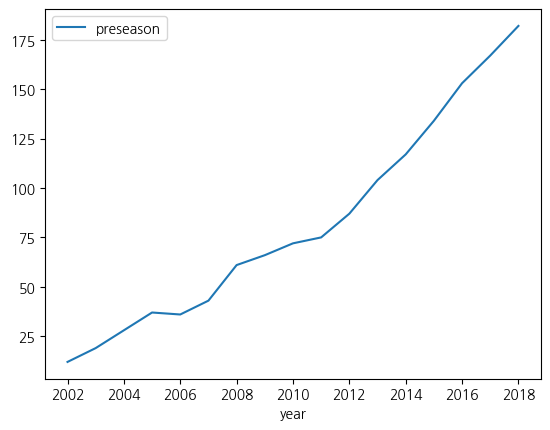

In [188]:
'''
그렇다면 각 연도별 등록된 선수의 수는 어떻게 될지 한 번 살펴보았다.
'''

batter_count_preseason = preseason.groupby('year')['batter_id'].count().rename('preseason').reset_index()
batter_count_preseason
batter_count_preseason.plot(kind='line', x='year', y='preseason')

'''
최근으로 올 수록 등록된 선수의 수가 늘어나는 것을 볼 수 있다.
''';

In [189]:
'''
이제 프리시즌과 정규시즌의 상관관계를 보려고 한다.
프리시즌의 성적이 정규시즌에 영향을 미치는가?

프리시즌에 성적이 좋았던 선수들은 과연 정규시즌에서도 성적이 좋은지 확인하려고 한다.

먼저 정규시즌을 불러오고 결측값을 확인한 후 채우는 작업을 한다.
'''

regular_season = pd.read_csv('./datas/Regular_Season_Batter.csv')
regular_season.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [190]:
'''
타율, SLG, OBP에서 각각 결측값이 발견되었다.
'''

regular_season.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

## 정규시즌 결측값 채우기

In [191]:
'''
먼저 SLG, OBP는 앞서 사용한 방식을 이용하여 채워주었다.
'''

def SLG_calc(row):
    # SLG가 NaN이 아닐 경우 그대로 반환
    if pd.notna(row['SLG']):
        return row['SLG']
    # 타수가 없는 경우
    if pd.notna(row['AB']) or row['AB'] == 0:
        return 0
    H = row['H'] - row[['2B', '3B', 'HR']].sum()
    SLG = (H + row['2B'] * 2 + row['3B'] * 3 + row['HR'] * 4) / row['AB']

    return SLG

def OBP_calc(row):
    # OBP가 NaN이 아닐 경우 그대로 반환
    if pd.notna(row['OBP']):
        return row['OBP']
    
    denominator = row[['H', 'BB', 'HBP']].sum()
    numerator = row[['AB', 'BB', 'HBP']].sum()
    
    # 분모 또는 분자가 0 인경우
    if denominator == 0 or numerator == 0:
        return 0
    
    OBP = denominator / numerator
    return OBP

# SLG 결측값 채우기
regular_season['SLG'] = regular_season.apply(SLG_calc, axis=1)
# OBP 결측값 채우기
regular_season['OBP'] = regular_season.apply(OBP_calc, axis=1)

# 결측값 확인
regular_season.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

In [192]:
'''
이제 SLG와 OBP를 채워주었으니 둘을 이용해 OPS를 채워주었다.
'''

def OPS_clac(row):
    # OBP가 NaN이 아닐 경우 그대로 반환
    if pd.notna(row['OPS']):
        return row['OPS']
    
    OPS = row[['SLG', 'OBP']].sum()
    return OPS

# OPS 결측값 채우기
regular_season['OPS'] = regular_season.apply(OPS_clac, axis=1)
# 결측값 확인
regular_season.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                   0
dtype: int64

In [193]:
'''
이제 타율을 채워주도록 하자

타율은 안타 / 타수로
AVG = H / AB 로 계산한다.

먼저 제대로 맞는지 확인해 보자
'''

print(regular_season.loc[0, 'H'] / regular_season.loc[0, 'AB'])
print(regular_season.loc[0, 'avg'])

'''
셋째 자리엣 반올림 하면 될 것 같다.
공식을 이용해서 적용했다.
'''

def AVG_calc(row):
    # avg가 이미 채워진 경우
    if pd.notna(row['avg']):
        return row['avg']
    # 타수 또는 안타가 0인 경우
    if row['AB'] == 0 or row['H'] == 0:
        return 0
    
    avg = regular_season.loc[0, 'H'] / regular_season.loc[0, 'AB']
    avg = round(avg, 3)
    return avg

regular_season['avg'] = regular_season.apply(AVG_calc, axis=1)

# 결측값 확인
regular_season.isna().sum()

0.33879781420765026
0.339


batter_id             0
batter_name           0
year                  0
team                  0
avg                   0
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                   0
dtype: int64

In [194]:
'''
먼저 정규시즌도 프리시즌과 똑같이 기초통계량을 확인해 보았다.
'''

display(regular_season.describe())

'''
정규 시즌은 프리시즌과 다르게 선수의 수가 매우 많다.

기록된 연도 또한 93년 부터 18년까지 존재한다.

그렇다면 프리시즌과 비교할 때 문제가 생길 수 있으므로 정규시즌과 프리시즌 두 곳에 모두 있는 선수과 연도만 사용해야할 것 같다.
''';

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,178.079462,2011.614507,0.235042,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.340183,0.303684,3.676447,0.643868
std,97.557947,4.992833,0.100894,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.166238,0.115253,4.585248,0.268184
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.200000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.263158,0.269000,0.000000,0.541000
50%,183.000000,2013.000000,0.253000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.358000,0.328000,2.000000,0.686000
75%,265.000000,2016.000000,0.290000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.434946,0.367000,5.000000,0.797000
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


In [195]:
'''
각 시즌에서 타자이름, 연도를 이용하여 새로운 인덱스를 만들고, 그 인덱스들을 교집합하여 나온 데이터를 이용하려고 한다.
'''

regular_season['new_index'] = regular_season['batter_name'] + regular_season['year'].apply(str)
preseason['new_index'] = preseason['batter_name'] + preseason['year'].apply(str)

intersection_batter = list(set(regular_season['new_index']).intersection(set(preseason['new_index'])))
print('교집합 된 선수의 수: ',len(intersection_batter))
print(sorted(intersection_batter))

'''
처음에 이상했다.
분명 앞에서 프리시즌을 확인 했을 때는 344명이였는데 왜 1358명이라는 교집합 수가 나올까
그래서 다시 확인 했는데 count 수를 보지 않고 max 수를 보았다....
''';

교집합 된 선수의 수:  1358
['가르시아2018', '강경학2011', '강경학2014', '강경학2015', '강경학2016', '강경학2017', '강구성2013', '강구성2016', '강구성2017', '강민국2014', '강민국2015', '강민국2016', '강민호2005', '강민호2006', '강민호2007', '강민호2008', '강민호2009', '강민호2010', '강민호2011', '강민호2012', '강민호2013', '강민호2014', '강민호2015', '강민호2016', '강민호2017', '강민호2018', '강백호2018', '강상원2017', '강상원2018', '강승호2016', '강승호2017', '강승호2018', '강진성2017', '강진성2018', '강한울2014', '강한울2015', '강한울2017', '강한울2018', '고종욱2011', '고종욱2015', '고종욱2016', '고종욱2017', '고종욱2018', '구자욱2015', '구자욱2016', '구자욱2017', '구자욱2018', '국해성2012', '국해성2015', '국해성2016', '국해성2017', '국해성2018', '권정웅2016', '권정웅2017', '권정웅2018', '권희동2013', '권희동2014', '권희동2017', '권희동2018', '김강민2003', '김강민2004', '김강민2005', '김강민2006', '김강민2007', '김강민2008', '김강민2009', '김강민2010', '김강민2011', '김강민2012', '김강민2013', '김강민2014', '김강민2015', '김강민2016', '김강민2017', '김강민2018', '김동엽2016', '김동엽2017', '김동엽2018', '김동욱2013', '김동욱2015', '김동욱2016', '김동욱2017', '김동욱2018', '김동한2013', '김동한2016', '김동한2017', '김동한2018', '김문호2007', '김문호2008', 

In [196]:
# 교집합 된 데이터만 불러오기
regular_season_intersection = regular_season.loc[regular_season['new_index'].apply(lambda x : x in intersection_batter)]
regular_season_intersection.describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,173.113402,2013.027246,0.251213,85.333579,247.955081,37.701767,70.106775,12.269514,1.252577,6.874080,105.503682,34.873343,6.684831,2.841679,25.645066,4.265096,47.424153,5.558910,0.368104,0.321404,4.497054,0.689507
std,94.678257,4.146897,0.083251,42.605644,171.813382,29.875080,54.131282,10.299543,1.907663,8.647075,85.927861,31.309521,10.007186,3.455258,21.855439,4.501909,33.018225,4.887141,0.137024,0.093583,4.913211,0.218710
min,0.000000,2002.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,0.222000,51.000000,78.000000,10.000000,17.000000,3.000000,0.000000,0.000000,23.000000,7.000000,0.000000,0.000000,6.000000,1.000000,18.000000,1.000000,0.301250,0.291000,1.000000,0.600500
50%,178.000000,2014.000000,0.265000,99.000000,257.000000,33.000000,65.000000,11.000000,0.000000,3.000000,93.000000,28.000000,3.000000,2.000000,22.000000,3.000000,47.000000,5.000000,0.379500,0.337000,3.000000,0.718000
75%,252.000000,2016.750000,0.299000,122.000000,407.000000,60.000000,116.000000,20.000000,2.000000,10.000000,173.000000,56.000000,8.750000,4.000000,41.000000,7.000000,71.000000,9.000000,0.451000,0.372000,7.000000,0.818000
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,66.000000,21.000000,108.000000,27.000000,161.000000,24.000000,1.000000,1.000000,30.000000,2.000000


In [197]:
regular_season_intersection.sort_values(by='new_index').reset_index(drop=True)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_index
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,342,황재균,2014,롯데,0.321,128,486,66,156,33,3,12,231,76,17,10,53,3,86,8,0.475,0.388,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.863,황재균2014
1354,342,황재균,2015,롯데,0.290,144,534,95,155,41,2,26,278,97,11,10,48,4,122,14,0.521,0.350,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.871,황재균2015
1355,342,황재균,2016,롯데,0.335,127,498,97,167,26,5,27,284,113,25,10,49,4,66,10,0.570,0.394,15,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.964,황재균2016
1356,342,황재균,2018,KT,0.296,142,530,76,157,41,3,25,279,88,14,7,49,4,120,5,0.526,0.358,17,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.884,황재균2018


In [198]:
# 프리시즌도 똑같이 작업했다.

preseason_intersection = preseason.loc[preseason['new_index'].apply(lambda x: x in intersection_batter)].copy()
preseason_intersection.sort_values(by='new_index').reset_index(drop=True)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_index
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,342,황재균,2014,롯데,0.407,10,27,3,11,2,0,1,16,4,1,0,2,0,5,0,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1354,342,황재균,2015,롯데,0.333,11,30,8,10,3,0,0,13,6,0,0,4,0,3,0,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1355,342,황재균,2016,롯데,0.310,16,42,8,13,3,1,0,18,4,3,1,4,0,4,0,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1356,342,황재균,2018,KT,0.250,6,16,3,4,1,0,1,8,4,0,0,2,0,6,0,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


In [199]:
# # 이제 교집합이 분류가 되었는지 확인해 보았다.

print(regular_season_intersection.shape, preseason_intersection.shape)
pd.DataFrame([regular_season_intersection['new_index'], preseason_intersection['new_index']])

'''
이름이 다르고 Nan인 부분이 굉장히 많았다.
분명 교집합으로 추출한거 같지만 실상 확인해 보니 교집합이 안되었다.
''';

(1358, 30) (1358, 30)


In [200]:
'''
그래서 다른 방법으로 시도해 보았다.
교집합을 만드는 과정부터 다시해 보았다.
'''

regular_season['new_index'] = regular_season['batter_name'] + regular_season['year'].apply(str)
preseason['new_index'] = preseason['batter_name'] + preseason['year'].apply(str)

intersection_batter = list(set(regular_season['new_index']).intersection(set(preseason['new_index'])))
print('교집합 된 선수의 수: ',len(intersection_batter))

regular_season_intersection = regular_season.loc[regular_season['new_index'].apply(lambda x : x in intersection_batter)]
regular_season_intersection = regular_season_intersection.sort_values(by='new_index').reset_index(drop=True)
preseason_intersection = preseason.loc[preseason['new_index'].apply(lambda x: x in intersection_batter)].copy()
preseason_intersection = preseason_intersection.sort_values(by='new_index').reset_index(drop=True)

print(regular_season_intersection.shape, preseason_intersection.shape)
print(sum(regular_season_intersection['new_index'] == preseason_intersection['new_index']))

'''
이유를 알아내었다.

regular_season_intersection.sort_values(by='new_index').reset_index(drop=True)
이 부분을 실행할 때 나는 다른 변수에 할당하지 않아도 변경되는줄 알았지만 다른 변수에 할당하여야 했다...
''';

교집합 된 선수의 수:  1358
(1358, 30) (1358, 30)
1358


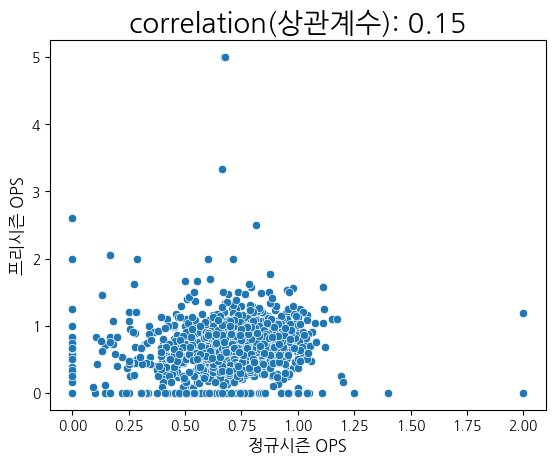

In [201]:
# 상관관계 알아보기

correlation = regular_season_intersection['OPS'].corr(preseason_intersection['OPS'])
sns.scatterplot(x=regular_season_intersection['OPS'], y=preseason_intersection['OPS'])
plt.title('correlation(상관계수): '+ str(np.round(correlation, 2)), fontsize=20)
plt.xlabel('정규시즌 OPS', fontsize=12)
plt.ylabel('프리시즌 OPS', fontsize=12)

'''
scatter가 선형적인 모습을 보이지 않는 것으로 보아 상관관계는 거의 없다고 본다.
''';

## 정규시즌 데이터 확인

In [202]:
'''
데이터는 위에 결측값을 채워둔 프레임을 가져와서 사용하려고 한다.
'''

display(regular_season.describe())
print(regular_season.shape)
regular_season.isna().sum()

'''
2454개의 행과 30개의 열을 가지고 있고,
선수 수는 2454명, 데이터는 1993년 부터 2018년까지 있다.
앞서 살펴본 프리시즌에 비해 데이터 양이 더 많은 것을 알 수 있다.
'''

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,178.079462,2011.614507,0.235042,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.340183,0.303684,3.676447,0.643868
std,97.557947,4.992833,0.100894,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.166238,0.115253,4.585248,0.268184
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.200000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.263158,0.269000,0.000000,0.541000
50%,183.000000,2013.000000,0.253000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.358000,0.328000,2.000000,0.686000
75%,265.000000,2016.000000,0.290000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.434946,0.367000,5.000000,0.797000
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


(2454, 30)


'\n2454개의 행과 30개의 열을 가지고 있고,\n선수 수는 2454명, 데이터는 1993년 부터 2018년까지 있다.\n앞서 살펴본 프리시즌에 비해 데이터 양이 더 많은 것을 알 수 있다.\n'

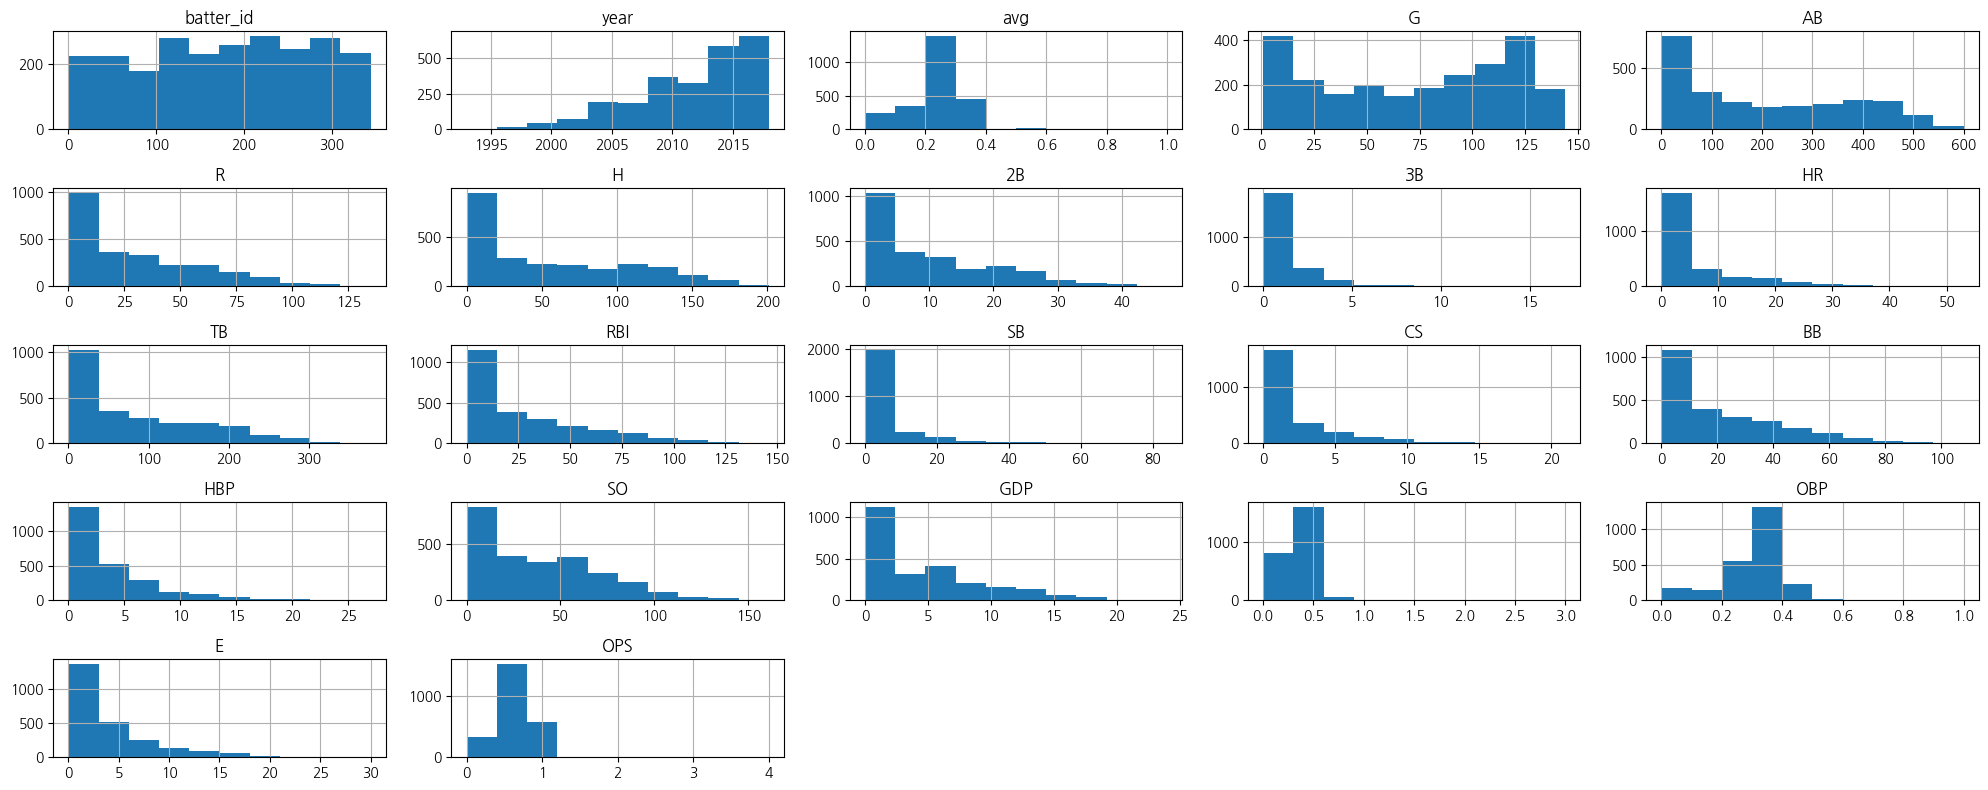

In [203]:
regular_season.hist(figsize=(20,8))
plt.tight_layout()
plt.show()

'''
이 데이터를 살펴 보았는데, 여전히 0쪽에 가까운 부분들이 있다.
R(득점), 안타(H), 홈런(HR) 등 타자 쪽 기록이 왼쪽에 가깝다.

하지만 반대로 투수 쪽 기록인 삼진(SO)이 꽤나 높은 것으로 보인다.
안타는 적은데 삼진이나 병살이 좀 높다, 그리고 볼넷도 좀 낮은 것으로 보아
투고타저가 좀 있다고 생각한다.

하지만 원래 투고타저를 확인해 보려면 투수의 성적을 보아야 하지만 없으므로 정확하지는 않다.
또한 정확히 나눌 수 있는 지표가 따로 없기 때문에 개인의 의견에 따라 갈리는 듯 하다.
''';

/tmp/ipykernel_40310/3071742329.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(), rotation=90) # x라벨 90회전


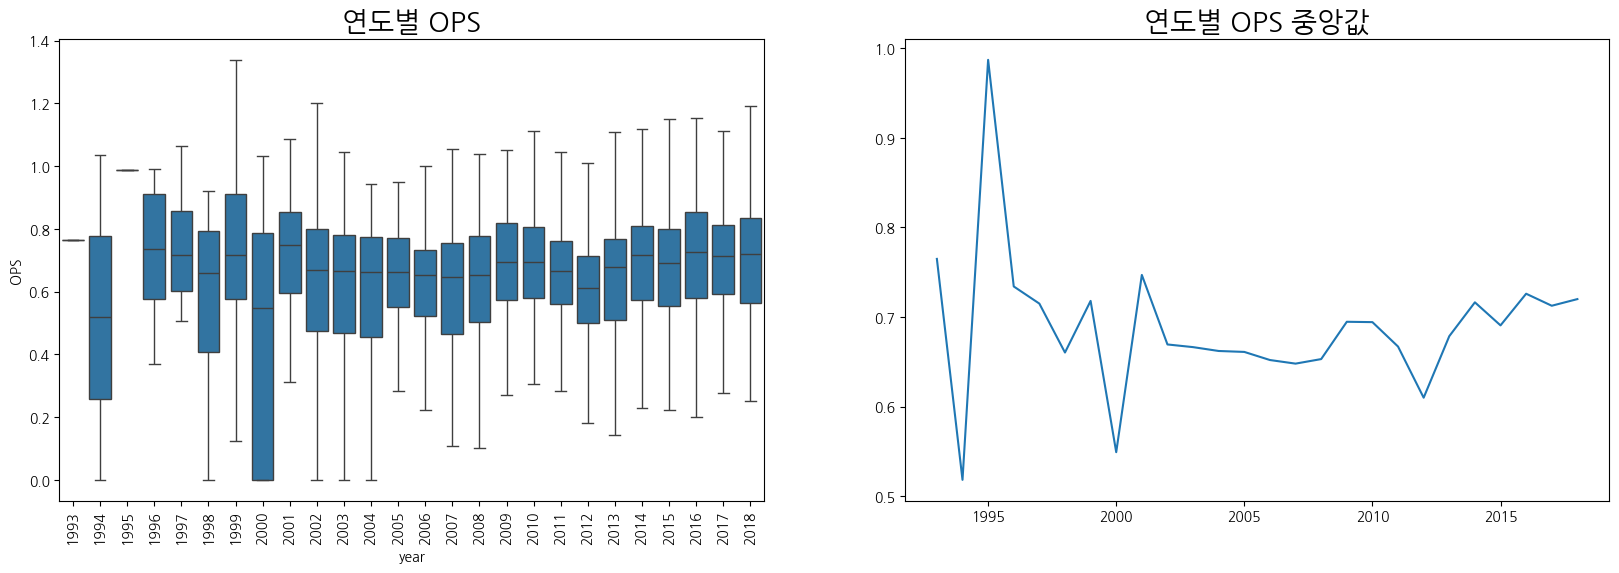

In [204]:
# OPS 박스 플롯 그리기

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)  # 1행 2열에서 1번째 그래프
f = sns.boxplot(x='year', y='OPS', data = regular_season, showfliers=False)
f.set_title('연도별 OPS', size=20)
f.set_xticklabels(f.get_xticklabels(), rotation=90) # x라벨 90회전
plt.subplot(1,2,2)
plt.plot(regular_season.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size=20)
plt.show()

'''
박스 플롯은 대부분 비슷한 그림이다.
하지만 연도별 중앙값에서는 93년 초방부터 00년까지 데이터에서 큰 변동폭을 보인다.

93년부터 00년까지의 데이터를 추출해 확인해 보려고 한다.
''';

In [205]:
'''
각 연도별 선수의 수를 확인해 보았다.

큰 변동 폭을 보였던 연도에는 역시나 선수의 수가 10명도 아닌 3명도 채 되지 않았다.
'''
pd.crosstab(regular_season['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


In [206]:
'''
이제 팀별 OPS를 비교해 보려고 한다.
'''

display(regular_season.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median'))


'''
몇 가지 문제가 있는데
1. 팀 명이 바뀌는 경우에는 하나로 되어있지 않고 따로 되어있다. 
    (현대 - 우리 - 히어로즈 - 넥센, OB - 두산과 같이 팀이 인수되어 변경되었지만 여기서는 반영되지 않고 다른 팀으로 분류되었다.)
2. 그러자니 창단부터 이어진 팀(삼성, 롯데)도 98년 이전에는 데이터가 없다.
3. 전신팀이 없는 경우도 있다.
    (한화 전신 빙그레, LG 전신 MBC)
    
그렇기 때문에 전신까지 모두 합쳐서 새로운 데이터프레임을 만들어볼 생각이다.
''';

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,0.681098,0.710473,0.583333,0.717176,0.546944,0.644474,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.774500,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.609035,0.698978,0.645345,0.674368,0.594543,0.657000,0.588000,0.661500,0.622015,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652500,0.636742,0.703500,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.000000,0.636000,0.494000,0.601000,0.682591,0.723500,0.693000,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,0.643209,0.672643,0.699575,0.639750,0.654608,0.679000,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,0.638655,0.662041,0.673000,0.586748,0.615000,0.725455,0.675000,0.653000,0.676715,0.581845,0.564000,0.689000,0.622000,0.704000,0.728000,0.7100


In [207]:
'''
전신 팀의 경우, 팀 이름은 현재 팀으로 간주한다.
ex) 해태, 기아 -> 기아
'''
team_list = set(regular_season['team']) # 팀 목록

new_team_dict = {
    '해태': 'KIA',
    'OB': '두산',
    '현대': '넥센',
    '우리': '넥센',
    '히어로즈': '넥센',
}

regular_season['team'] = regular_season['team'].map(new_team_dict).fillna(regular_season['team'])

# 피벗 테이블 만들기
regular_season_pivot = regular_season.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')
display(regular_season_pivot)

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,0.764912,1.036198,0.987261,0.781758,0.836358,0.844605,0.492506,0.463483,0.849337,0.829906,0.681098,0.710473,0.583333,0.717176,0.546944,0.644474,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.774500,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.609035,0.698978,0.645345,0.674368,0.594543,0.657000,0.588000,0.661500,0.622015,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652500,0.636742,0.703500,0.703000,0.705000,0.6000
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.000000,0.636000,0.494000,0.601000,0.682591,0.723500,0.693000,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,0.833385,0.783934,0.547971,0.794743,0.838528,0.828384,0.673733,0.819444,0.716000,0.721571,0.677000,0.613006,0.645375,0.598059,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,0.615797,0.727667,0.853830,0.739755,0.695808,0.762809,0.643209,0.672643,0.699575,0.639750,0.654608,0.679000,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,0.638655,0.662041,0.673000,0.586748,0.615000,0.725455,0.675000,0.653000,0.676715,0.581845,0.564000,0.689000,0.622000,0.704000,0.728000,0.7100
삼성,NaN,NaN,NaN,NaN,NaN,NaN,0.575549,0.369048,0.830124,0.742000,0.428000,0.579137,0.741419,0.717275,0.597875,0.669774,0.684000,0.771000,0.677606,0.614071,0.712500,0.737000,0.724000,0.717500,0.684000,0.6515


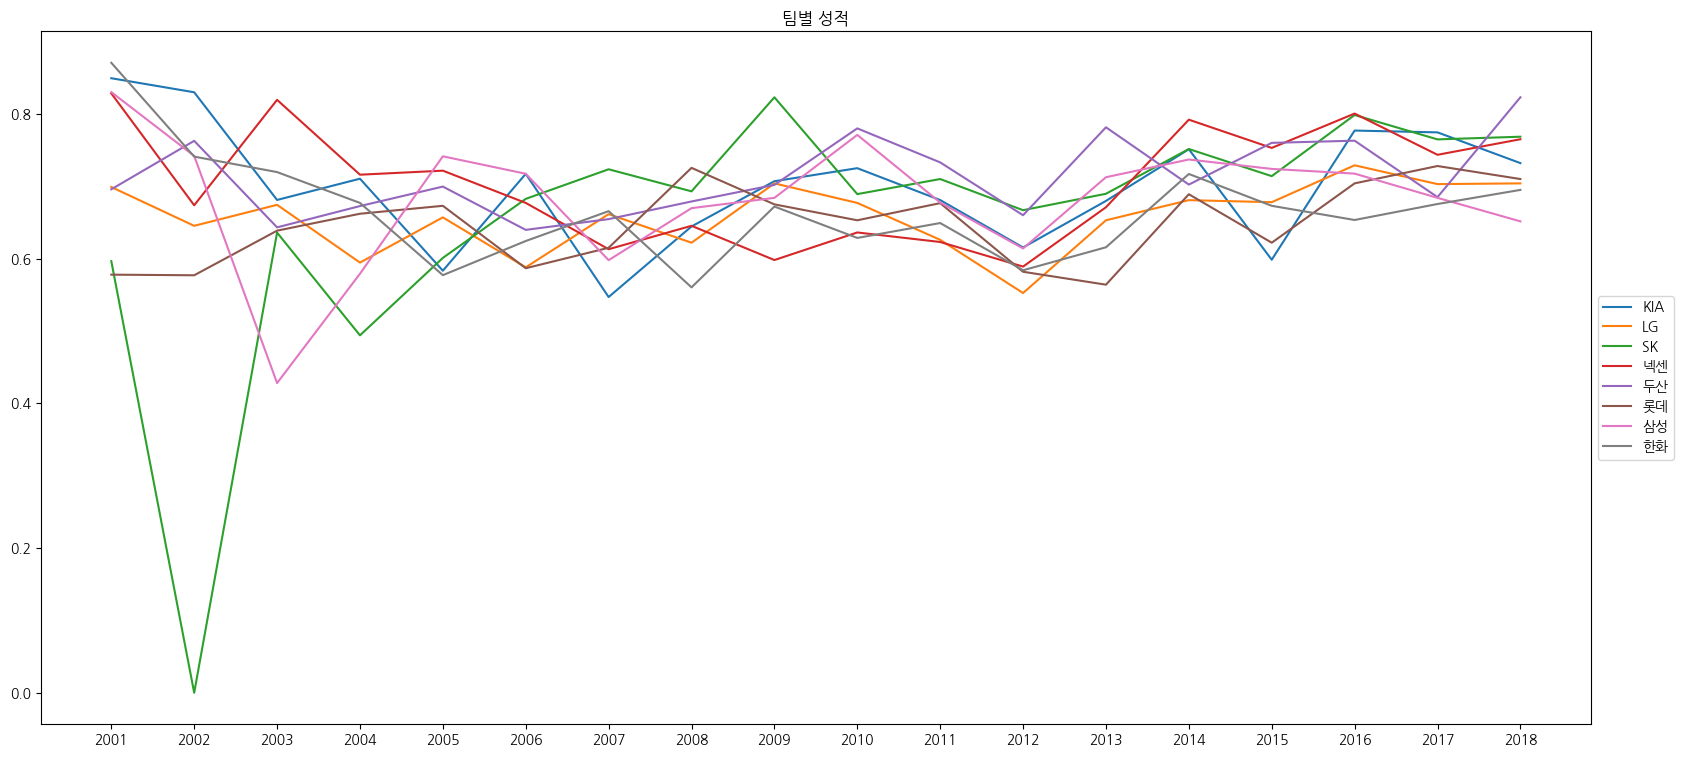

In [208]:
'''
비교적 최근에 창단되어 데이터가 없는 팀(NC, KT)은 데이터가 적기 때문에 제외한다.
또한 데이터가 없는 팀(쌍방울)도 제외한다.
그리고 모든 팀이  데이터가 있는 01년부터 OPS 값을 살펴보려고 한다.
'''

# 01년 이후 NaN 값이 있는 팀은 제외
team_list = regular_season_pivot.loc[:, 2001:].isna().sum(axis=1) <= 0

plt.figure(figsize=(20,9))
plt.plot(regular_season_pivot.loc[team_list, 2001:].T)
plt.legend(regular_season_pivot.loc[team_list, 2001:].T.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(regular_season_pivot.loc[team_list, 2001:].columns)
plt.title('팀별 성적')
plt.show()

'''
하지만 위에서 봤듯이 OPS가 그나마 중앙에 모여있는 2005년 이전(사실 대부분)의 데이터의 수가 매우 적다.
''';

### 키와 몸무게로 분석

In [225]:
'''
키와 몸무게 그리고 포지션에서도 결측치가 존재한다.
'''

# 결측치 확인
print(regular_season.isna().sum())
regular_season.head(2)

batter_id             0
batter_name           0
year                  0
team                  0
avg                   0
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                   0
new_index             0
dtype: int64


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_index
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011


In [ ]:
'''
키/몸무게/포지션을 채워주려고 한다.
선수 키/몸무게/포지션은 KBO 홈페이지에서, 그리고 우투우타, 좌투우타와 같은 경우는 위키백과에서 검색하여 가져왔다.
'''

'./batter_height_weight_position_insert.ipynb'